In [1]:
import os, sys

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.utils.extmath import row_norms
from sklearn.metrics.pairwise import _euclidean_distances

sns.set(style="whitegrid")

project_dir = os.path.abspath("..")
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

from yace.clustering.kmeans import kmeans_plusplus

In [2]:
X = np.array([
    [ -0.794152276623841, 2.104951171962879, ],
    [ -9.151551856068068, -4.812864488195191, ],
    [ -11.44182630908269, -4.4578144103096555, ],
    [ -9.767617768288718, -3.19133736705118, ],
    [ -4.536556476851341, -8.401862882339504, ],
    [ -6.263021151786394, -8.1066608061999, ],
    [ -6.384812343779634, -8.473029703522716, ],
    [ -9.204905637733754, -4.5768792770429965, ],
    [ -2.760179083161441, 5.551213578682775, ],
    [ -1.1710417594110225, 4.330918155822106, ],
    [ -10.036408012919152, -5.5691209020665, ],
    [ -9.875891232661665, -2.823864639451285, ],
    [ -7.175329210075055, -8.770590168336406, ],
    [ -2.406718199699357, 6.098944469870908, ],
    [ -4.874182454688006, -10.049589027515138, ],
    [ -6.078546995836497, -7.939694203288603, ],
    [ -6.832387624479001, -7.47067669775956, ],
    [ -2.346732606068119, 3.561284227344442, ],
    [ -10.341566179224177, -3.9097516905289575, ],
    [ -11.092624349394143, -3.7839661143045364, ],
    [ -6.502121087038712, -7.912491012386313, ],
    [ -10.263931009656723, -3.920734000669846, ],
    [ -6.816083022269968, -8.449869256994909, ],
    [ -1.340520809891421, 4.157119493365752, ],
    [ -10.372997453743215, -4.592078954817427, ],
    [ -7.374998957175799, -10.588065868731183, ],
    [ -6.623517740089157, -8.253383337907545, ],
    [ -1.359389585992692, 4.054240022349643, ],
    [ -0.19745196890354544, 2.3463491593455075, ],
    [ -6.5443058465843675, -9.297569494247188, ],
    [ -1.9274479855745354, 4.9368453355813475, ],
    [ -2.8020781039706595, 4.057147146430284, ],
    [ -7.581976641577967, -9.150254932274308, ],
    [ -1.8513954583101344, 3.5188609047583252, ],
    [ -8.370061750504195, -3.615336850788729, ],
    [ -7.251451955565088, -8.25497397715319, ],
    [ -8.798794623751593, -3.7681921298792607, ],
    [ -11.370829823899857, -3.6381891553209127, ],
    [ -10.178632805731251, -4.557269175156462, ],
    [ -7.2013269275537715, -8.272282292398854, ],
    [ -6.7842171065351, -8.226340808371322, ],
    [ -9.647166524988995, -5.265631958600636, ],
    [ -1.9819771099620271, 4.022435514174746, ],
    [ -11.227770639320063, -3.402811051386989, ],
    [ -9.799412783526332, -3.834339901555746, ],
    [ -6.5354168593050295, -8.015526894626658, ],
    [ -0.757969185355724, 4.908984207745029, ],
    [ 0.5260155005846419, 3.009993533355024, ],
    [ -2.7768702545837973, 4.640905566660254, ],
    [ -1.7824501314671677, 3.4707204345840927, ],
    [ -10.220040646263461, -4.154106616293202, ],
    [ -6.4058323875575285, -9.780666445240302, ],
    [ -6.987061055745032, -7.5348478426255205, ],
    [ -7.465760375446665, -7.329222486173637, ],
    [ -1.5394009534668904, 5.023692978550581, ],
    [ -6.569670859679778, -8.327931264366546, ],
    [ -10.617713347601232, -3.255316513290986, ],
    [ -8.723956573494325, -1.98624679810847, ],
    [ -1.6173461592329268, 4.9893050825589835, ],
    [ -1.1466300855305107, 4.108397033740446, ],
    [ -9.811151112664817, -3.543296900154948, ],
    [ -7.711798871912647, -7.251741212975334, ],
    [ -6.561697370222412, -6.860002222091783, ],
    [ -10.02232945952888, -4.728510166532364, ],
    [ -11.855694368099854, -2.7171845169103843, ],
    [ -5.733425071070147, -8.440535968100065, ],
    [ -2.4139578469451726, 5.659358024076449, ],
    [ -8.337440938903733, -7.839680384160613, ],
    [ -1.8319881134989553, 3.5286314509217895, ],
    [ -9.574218149588988, -3.8760084790146454, ],
    [ -9.5942208618623, -3.3597700241261377, ],
    [ -9.257156052556827, -4.907049149171139, ],
    [ -6.46256290336211, -7.732945900976985, ],
    [ -0.8205764920740146, 5.337591950146718, ],
    [ 0.00024227116135100424, 5.148534029420497, ],
    [ -9.682077556411496, -5.975549763187208, ],
    [ -6.195996026651871, -7.402816464759037, ],
    [ -7.02121319047935, -8.379542347137651, ],
    [ -2.187731658211975, 3.333521246686991, ],
    [ -10.4448410684391, -2.7288408425577058, ],
    [ -0.5279305184970926, 5.92630668526536, ],
    [ -11.196980535988288, -3.090003229819183, ],
    [ -9.837675434205272, -3.0771796262469797, ],
    [ -5.160223475316758, -7.04217140606354, ],
    [ -2.351220657673829, 4.0097363419871845, ],
    [ -0.5257904636130821, 3.3065986015291307, ],
    [ -1.4686444212810534, 6.506745005322004, ],
    [ -0.7587039566841077, 3.7227620096688283, ],
    [ -10.303916516281474, -3.1253739047559583, ],
    [ -2.3308060367853387, 4.39382526992426, ],
    [ -5.904543613663969, -7.783735388248322, ],
    [ -1.6087521511724905, 3.769494222273808, ],
    [ -1.8684541393232976, 4.993113060025359, ],
    [ -10.668374789942131, -3.5757847610422853, ],
    [ -8.876294795417436, -3.544448009426377, ],
    [ -6.026057581798325, -5.966248457649787, ],
    [ -7.047472775357734, -9.275246833370932, ],
    [ -1.3739725806942609, 5.291631033113889, ],
    [ -6.2539305108541825, -7.108786009916786, ],
    [ 0.08525185826796045, 3.6452829679480585, ],
    [ 1.0, -10.0, ], 
    [ 6.0, -16.0, ],
])


In [3]:
x_squared_norms = row_norms(X, squared=True)
centers = kmeans_plusplus(X=X, n_clusters=5, x_squared_norms=x_squared_norms, random_state=None)

In [4]:
D = _euclidean_distances(X=X, Y=X[centers], X_norm_squared=x_squared_norms, Y_norm_squared=x_squared_norms[centers], squared=True)    
cluster_labels = np.argmin(D, axis=1)

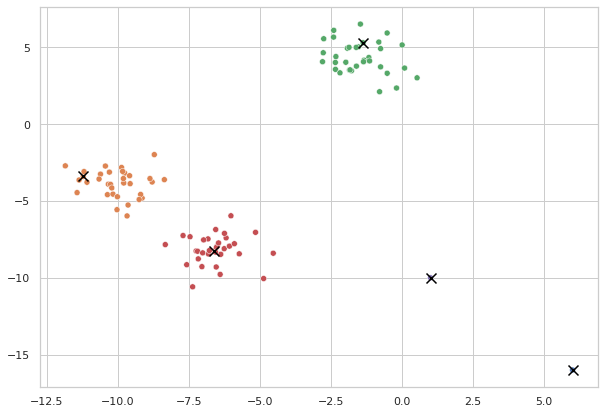

In [5]:
cluster_colors = sns.color_palette()
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=X[:,0], y=X[:,1], c=[cluster_colors[c] for c in cluster_labels], ax=ax)
for center_point in centers:
    ax.scatter(
        X[center_point,0],
        X[center_point,1],
        color='black',
        marker='x', s=100, label="k-means++ centers")